Name : Pradyumna PS
Email ID : pradyumnaps193@gmail.com   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

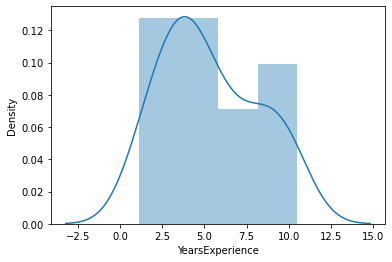

In [5]:
sns.distplot(data["YearsExperience"])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

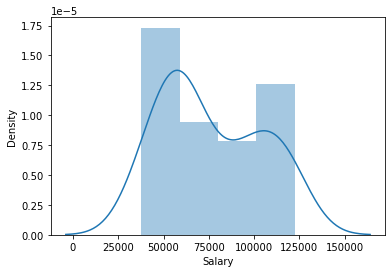

In [6]:
sns.distplot(data["Salary"])

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

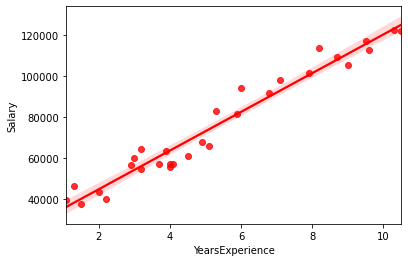

In [8]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'], color="red")

In [9]:
model = smf.ols("Salary~YearsExperience",data=data).fit()

In [10]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
print(model.tvalues)
print(model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [12]:
print(model.rsquared)
print(model.rsquared_adj)

0.9569566641435086
0.9554194021486339


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        15:08:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Model Prediction
Salary = (25792.200199) + (9449.962321)*(2)
Salary

44692.124841

In [15]:
new_data=pd.Series([6,7])
new_data

0    6
1    7
dtype: int64

In [16]:
data_pred = pd.DataFrame(new_data, columns=["YearsExperience"])
data_pred

,YearsExperience
0,6
1,7


In [17]:
model.predict(data_pred)

0    82491.974127
1    91941.936449
dtype: float64

In [18]:
model1 = smf.ols("np.sqrt(Salary)~np.log(YearsExperience)",data=data).fit()

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     211.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.41e-14
Time:                        15:08:59   Log-Likelihood:                -127.03
No. Observations:                  30   AIC:                             258.1
Df Residuals:                      28   BIC:                             260.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 158.8036      8.357     19.003      0.000     141.686     175.921
np.log(YearsExperience)    74.7676      5.142     14.542      0.000      64.236      85.300
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.576
Skew:                           0.107   Prob(JB):                        0.750
Kurtosis:                       2.356   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model1.rsquared*100

88.30727062597234

In [21]:
model1.params

Intercept                  158.80360
np.log(YearsExperience)     74.76761
dtype: float64

In [24]:
model2 = smf.ols("np.log(Salary)~np.sqrt(YearsExperience)",data=data).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     466.4
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.37e-19
Time:                        15:10:21   Log-Likelihood:                 30.933
No. Observations:                  30   AIC:                            -57.87
Df Residuals:                      28   BIC:                            -55.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.9274      0.060    165.502      0.000       9.805      10.050
np.sqrt(YearsExperience)     0.5620      0.026     21.596      0.000       0.509       0.615
==============================================================================
Omnibus:                        1.111   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.938
Skew:                           0.186   Prob(JB):                        0.626
Kurtosis:                       2.218   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2.params

Intercept                   9.927378
np.sqrt(YearsExperience)    0.561974
dtype: float64

In [29]:
print(model2.pvalues)
print(model2.tvalues)

Intercept                   2.005490e-43
np.sqrt(YearsExperience)    5.366684e-19
dtype: float64
Intercept                   165.501729
np.sqrt(YearsExperience)     21.595708
dtype: float64


In [30]:
data["YearsExperience_sq"] = data.YearsExperience**2

In [40]:
model3 = smf.ols("(Salary)~(YearsExperience_sq+YearsExperience)",data=data).fit()

In [41]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.59e-19
Time:                        15:16:00   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model3.params

Intercept             26214.932677
YearsExperience_sq       16.392566
YearsExperience        9259.283888
dtype: float64

In [43]:
print(model3.pvalues)
print(model3.tvalues)

Intercept             0.000004
YearsExperience_sq    0.914983
YearsExperience       0.000022
dtype: float64
Intercept             5.755611
YearsExperience_sq    0.107760
YearsExperience       5.112783
dtype: float64
